# Mundo 27

### Análise de dados
### Grupby: como calcular os retornos acumalados de mês a mês de um modelo de investimento

In [1]:
import pandas as pd
import yfinance as yf
import numpy as np


#### Group by -> Separar, aplicar, combinar

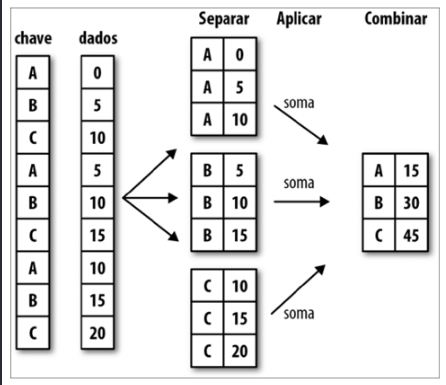


In [2]:
#Group by para calcular retorno acum
#Group by para calcular o retorno medio por ação
#group by que calcula o acumulado de lucro de ano por empresa

In [5]:
dados_fundamentalistas = pd.DataFrame({"Empresa":["WEGE","WEGE","WEGE","WEGE",
                                                  "PETROBRAS","PETROBRAS","PETROBRAS","PETROBRAS"],
                                        "Trimestre":["1TRI","2TRI","3TRI","4TRI"]*2,
                                        "Lucro":[20,30,40,55,90,95,105,123]})

dados_fundamentalistas

,Empresa,Trimestre,Lucro
0,WEGE,1TRI,20
1,WEGE,2TRI,30
2,WEGE,3TRI,40
3,WEGE,4TRI,55
4,PETROBRAS,1TRI,90
5,PETROBRAS,2TRI,95
6,PETROBRAS,3TRI,105
7,PETROBRAS,4TRI,123


In [9]:
#como calcular o lucro acumulado no ano?
#colocando uma ação
dados_fundamentalistas.groupby("Empresa").sum() #inferiu
#colocando uma ação especifica em uma coluna especifica
dados_fundamentalistas.groupby("Empresa")['Lucro'].sum()

C:\Users\Tiago\AppData\Local\Temp\ipykernel_98712\3397403355.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dados_fundamentalistas.groupby("Empresa").sum() #inferiu


Empresa
PETROBRAS    413
WEGE         145
Name: Lucro, dtype: int64

In [10]:
acoes = ['WEGE3.SA', 'VALE3.SA', 'PETR4.SA', 'LREN3.SA']

dados_acao = yf.download(acoes, "2019-08-31", "2022-08-31")['Adj Close']

retornos = dados_acao.pct_change().dropna()

retornos

[*********************100%***********************]  4 of 4 completed


,LREN3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,
2019-09-03,-0.011720,0.011858,-0.010650,-0.025900
2019-09-04,0.015477,0.025781,0.021968,0.019829
2019-09-05,-0.005344,0.004951,0.000000,0.006628
2019-09-06,-0.005572,0.004926,-0.001505,0.002634
2019-09-09,-0.009606,0.015460,0.031001,-0.011384
...,...,...,...,...
2022-08-24,0.008518,0.005981,-0.032189,-0.000347
2022-08-25,0.013588,-0.010702,0.019426,0.005558
2022-08-26,0.007246,0.010817,-0.015014,-0.004836


In [12]:
#modelo que compra 25% das empresas por dia
retornos['rent_modelo'] = retornos['WEGE3.SA'] * 0.25 + retornos['VALE3.SA'] * 0.25 + retornos['PETR4.SA'] * 0.25 + retornos['LREN3.SA'] * 0.25

retornos

,LREN3.SA,PETR4.SA,VALE3.SA,WEGE3.SA,ano,rent_modelo
Date,,,,,,
2019-09-03,-0.011720,0.011858,-0.010650,-0.025900,2019,-0.009103
2019-09-04,0.015477,0.025781,0.021968,0.019829,2019,0.020764
2019-09-05,-0.005344,0.004951,0.000000,0.006628,2019,0.001559
2019-09-06,-0.005572,0.004926,-0.001505,0.002634,2019,0.000121
2019-09-09,-0.009606,0.015460,0.031001,-0.011384,2019,0.006368
...,...,...,...,...,...,...
2022-08-24,0.008518,0.005981,-0.032189,-0.000347,2022,-0.004509
2022-08-25,0.013588,-0.010702,0.019426,0.005558,2022,0.006967
2022-08-26,0.007246,0.010817,-0.015014,-0.004836,2022,-0.000446


In [11]:
#como calcular o retorno anual do nosso modelo?
retornos["ano"] = retornos.index.year

retornos

,LREN3.SA,PETR4.SA,VALE3.SA,WEGE3.SA,ano
Date,,,,,
2019-09-03,-0.011720,0.011858,-0.010650,-0.025900,2019
2019-09-04,0.015477,0.025781,0.021968,0.019829,2019
2019-09-05,-0.005344,0.004951,0.000000,0.006628,2019
2019-09-06,-0.005572,0.004926,-0.001505,0.002634,2019
2019-09-09,-0.009606,0.015460,0.031001,-0.011384,2019
...,...,...,...,...,...
2022-08-24,0.008518,0.005981,-0.032189,-0.000347,2022
2022-08-25,0.013588,-0.010702,0.019426,0.005558,2022
2022-08-26,0.007246,0.010817,-0.015014,-0.004836,2022


In [13]:
retornos['rent_modelo'] = 1 + retornos['rent_modelo']

retornos['rent_YTD'] = retornos.groupby('ano')['rent_modelo'].cumprod()-1

retornos

,LREN3.SA,PETR4.SA,VALE3.SA,WEGE3.SA,ano,rent_modelo,rent_YTD
Date,,,,,,,
2019-09-03,-0.011720,0.011858,-0.010650,-0.025900,2019,0.990897,-0.009103
2019-09-04,0.015477,0.025781,0.021968,0.019829,2019,1.020764,0.011472
2019-09-05,-0.005344,0.004951,0.000000,0.006628,2019,1.001559,0.013048
2019-09-06,-0.005572,0.004926,-0.001505,0.002634,2019,1.000121,0.013171
2019-09-09,-0.009606,0.015460,0.031001,-0.011384,2019,1.006368,0.019622
...,...,...,...,...,...,...,...
2022-08-24,0.008518,0.005981,-0.032189,-0.000347,2022,0.995491,0.174900
2022-08-25,0.013588,-0.010702,0.019426,0.005558,2022,1.006967,0.183086
2022-08-26,0.007246,0.010817,-0.015014,-0.004836,2022,0.999554,0.182557


In [15]:
#agora vamos pegar o ultimo dia de cada ano

retornos.groupby('ano').tail(1)
#pegar a visualização de uma coisa especifica
retornos.groupby('ano').tail(1)['rent_YTD']

Date
2019-12-30    0.261954
2020-12-30    0.379288
2021-12-30   -0.059653
2022-08-30    0.149523
Name: rent_YTD, dtype: float64

In [16]:
retornos = dados_acao.pct_change().dropna()
retornos['rent_modelo'] = retornos['WEGE3.SA'] * 0.25 + retornos['VALE3.SA'] * 0.25 + retornos['PETR4.SA'] * 0.25 + retornos['LREN3.SA'] * 0.25

retornos['ano'] = retornos.index.year
retornos['mes'] = retornos.index.month

retornos['rent_modelo'] = 1 + retornos['rent_modelo']

retornos['rent_MTD'] = retornos.groupby(['ano', 'mes'])['rent_modelo'].cumprod() - 1

retornos.groupby(['ano', 'mes']).tail(1)[['ano', 'mes', 'rent_MTD']]

,ano,mes,rent_MTD
Date,,,
2019-09-30,2019,9,0.050354
2019-10-31,2019,10,0.038167
2019-11-29,2019,11,0.058393
2019-12-30,2019,12,0.093436
2020-01-31,2020,1,0.009980
2020-02-28,2020,2,-0.050906
2020-03-31,2020,3,-0.264513
2020-04-30,2020,4,0.171596
2020-05-29,2020,5,0.094698


In [17]:
#retorno medio por ano 
retornos.groupby("ano")['rent_modelo'].mean() - 1

ano
2019    0.002925
2020    0.001797
2021   -0.000130
2022    0.000950
Name: rent_modelo, dtype: float64

# Exercícios
<BR>

* Exercício 86: Crie um programa que o usuário escolha uma ação e uma data inicial. Puxe os dados de volume da ação escolhida e calcule a média de volume mensal negociado por mês desde a data escolhida até o dia 31/08/2022. 

    Obs: a resposta deve ser em reais e o Yahoo finance disponibiliza o volume em número de ações negociadas.
<BR>
   
* Exercício 87: Com os mesmos dados de volume, calcule o volume total negoaciado por ano da ação. 

In [30]:
data_escolhida = input("Digite uma data para começar")
acao_escolhida = "WEGE3.SA"

dados = yf.download(acao_escolhida,start=data_escolhida, end ="2022-08-31" )

dados['Volume financeiro'] = dados['Volume'] * dados['Close']

dados['ano'] = dados.index.year
dados['mes'] = dados.index.month

volume_medio_mensal = dados.groupby(['ano','mes'])['Volume financeiro'].mean()

volume_medio_mensal = volume_medio_mensal.astype(int)
print(f"O volume médio da {acao_escolhida} negociado mês a mês é:")
print(volume_medio_mensal)

[*********************100%***********************]  1 of 1 completed
O volume médio da WEGE3.SA negociado mês a mês é:
ano   mes
2012  8        2801939
      9        6313309
      10       5374082
      11      52996578
      12      23804934
               ...    
2022  4      259013029
      5      269399932
      6      265401649
      7      215687492
      8      202052680
Name: Volume financeiro, Length: 121, dtype: int32


In [34]:
volume_total_anual = dados.groupby(['ano'])['Volume financeiro'].sum()

volume_total_anual

ano
2012    1.676408e+09
2013    3.749596e+09
2014    5.788061e+09
2015    6.862882e+09
2016    7.993962e+09
2017    8.986931e+09
2018    1.278269e+10
2019    1.834166e+10
2020    8.341313e+10
2021    8.566937e+10
2022    4.150127e+10
Name: Volume financeiro, dtype: float64